In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
#load dataset
digit_mnist = keras.datasets.mnist
(Xtrain,Ytrain),(Xtest,Ytest)=digit_mnist.load_data() #spilt the dataset

In [4]:
print("Shape of training data: ",Xtrain.shape)
print("Shape of test data: ",Xtest.shape)

Shape of training data:  (60000, 28, 28)
Shape of test data:  (10000, 28, 28)


In [5]:
#normalizing the feature values
Xtrain = Xtrain.astype("float32")/255.0
Xtest = Xtest.astype("float32")/255.0

In [6]:
#convert the labels from integer to vector
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

In [7]:
#create the deep network architecture
# everywhere relu activation except output layer(sigmoid)
model_1= Sequential()
model_1.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model_1.add(Dense(10))
    model_1.add(Activation("relu"))
    model_1.add(BatchNormalization())
model_1.add(Dense(10,activation="sigmoid"))

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [11]:
#training the model using adam
batch_size = 64
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])


In [12]:
model_1.fit(Xtrain,Ytrain, epochs=30,batch_size=batch_size,validation_data=(Xtest,Ytest), shuffle=True, verbose=1)

Epoch 1/30
938/938 [==============================] - 4s 3ms/step - loss: 0.4169 - accuracy: 0.8937 - val_loss: 0.3725 - val_accuracy: 0.9042
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4175 - accuracy: 0.8934 - val_loss: 0.3704 - val_accuracy: 0.9039
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4155 - accuracy: 0.8935 - val_loss: 0.3643 - val_accuracy: 0.9048
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4085 - accuracy: 0.8958 - val_loss: 0.3637 - val_accuracy: 0.9050
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4022 - accuracy: 0.8981 - val_loss: 0.3612 - val_accuracy: 0.9049
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3966 - accuracy: 0.8995 - val_loss: 0.3598 - val_accuracy: 0.9090
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3973 - accuracy: 0.8988 - val_loss: 0.3577 - val_accuracy: 0.9078
Epoch 

In [13]:
# evaluate the network on the testing data to obtain our final classifications
test_loss_1, test_acc_1 = model_1.evaluate(Xtest,Ytest)
print("Test accuracy of model-1: ", test_acc_1)

313/313 [==============================] - 0s 922us/step - loss: 0.3303 - accuracy: 0.9098
Test accuracy of model-1:  0.9097999930381775


In [14]:
#prediction on test data
predictions = model_1.predict(Xtest)
print(predictions[5])
print(np.argmax(predictions[5]))

313/313 [==============================] - 0s 792us/step
[0.39599073 0.99980175 0.8242614  0.04138685 0.46561313 0.02686111
 0.68699217 0.2867865  0.8158914  0.312934  ]
1


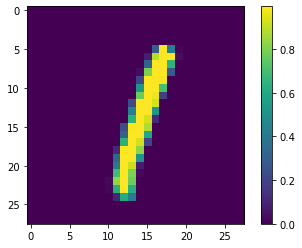

In [15]:
#Showing the testing input
plt.figure()
plt.imshow(Xtest[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
#model -2 => sigmoid activation everywhere
model_2= Sequential()
model_2.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model_2.add(Dense(10))
    model_2.add(Activation("sigmoid"))
    model_2.add(BatchNormalization())
model_2.add(Dense(10,activation="sigmoid"))

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                      

In [18]:
model_2.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [19]:
model_2.fit(Xtrain,Ytrain, epochs=30,batch_size=batch_size,validation_data=(Xtest,Ytest), shuffle=True, verbose=1)

Epoch 1/30
938/938 [==============================] - 5s 3ms/step - loss: 1.6506 - accuracy: 0.4771 - val_loss: 1.1720 - val_accuracy: 0.7224
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 1.0117 - accuracy: 0.7574 - val_loss: 0.7926 - val_accuracy: 0.8334
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.7327 - accuracy: 0.8297 - val_loss: 0.5671 - val_accuracy: 0.8764
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.5755 - accuracy: 0.8568 - val_loss: 0.4559 - val_accuracy: 0.8903
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4920 - accuracy: 0.8707 - val_loss: 0.3954 - val_accuracy: 0.8976
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.8803 - val_loss: 0.3573 - val_accuracy: 0.9057
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4107 - accuracy: 0.8853 - val_loss: 0.3329 - val_accuracy: 0.9079
Epoch 

In [20]:
test_loss_2, test_acc_2 = model_2.evaluate(Xtest,Ytest)
print("Test accuracy of model-2: ", test_acc_2)

313/313 [==============================] - 0s 943us/step - loss: 0.2028 - accuracy: 0.9419
Test accuracy of model-2:  0.9419000148773193
